$$
In\;the\;name\;of\;God
$$
Logistc regression

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
def randcir(X, Y, r): # X & Y represent the center & r is for radius
    while True:
        x = random.random()*2 -1
        y = random.random()*2 -1
        if x*x + y*y < 1:
            return (x*r+X, y*r+Y)
        

In [11]:
randcir(2, 2, 1)

(1.4950743360416043, 2.2368280206155635)

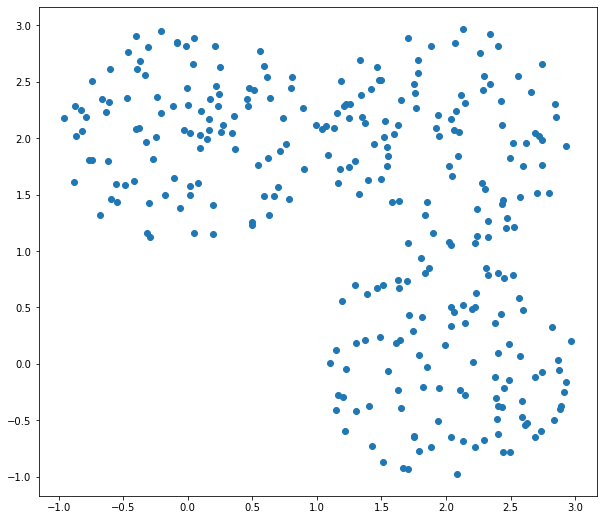

In [31]:
l = []
w = []
for i in range(100):
    x, y = randcir(2, 2, 1)
    l.append(x)
    w.append(y)
    
for i in range(100):
    x, y = randcir(0, 2, 1)
    l.append(x)
    w.append(y)
    
    
for i in range(100):
    x, y = randcir(2, 0, 1)
    l.append(x)
    w.append(y)

plt.figure(figsize=(10,9))    
plt.scatter(l, w)

plt.show()

In [12]:
l = []
l.append(4)

In [14]:
l.append(8)

In [15]:
l

[4, 8]